In [2]:
import numpy as np
import pandas as pd
# Reading ratings file
ratings = pd.read_csv('data/ratings2.csv',  encoding='latin-1',
                      usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('data/users.csv', encoding='latin-1',
                    usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('data/movies.csv',  encoding='latin-1',
                     usecols=['movie_id', 'title', 'genres'])


In [3]:
user_counts = ratings['user_id'].value_counts()
active_users = user_counts[user_counts > 100].index.tolist()
active_ratings = ratings[ratings['user_id'].isin(active_users)]
merge_ratings = pd.merge(active_ratings, movies, on='movie_id')
merge_ratings['genres'] = merge_ratings['genres'].str.split('|')
merge_ratings = merge_ratings.explode('genres')

ratings_pivot = pd.pivot_table(
    merge_ratings, values='rating', index='user_id', columns='genres', aggfunc=np.mean)
ratings_pivot = ratings_pivot.fillna(0)

ratings_pivot


genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
user_id,,,,,,,,,,,,,,,,,,
2,3.500000,3.736842,0.000000,0.000000,3.560000,3.583333,0.000000,3.898734,3.000000,4.000000,3.000000,0.000000,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,0.000000,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
8,4.027778,3.888889,4.250000,3.000000,3.888889,4.000000,0.000000,3.814815,0.000000,0.000000,5.000000,4.000000,3.500000,4.066667,4.461538,4.034483,4.200000,4.000000
9,3.500000,3.428571,4.111111,4.200000,3.740741,3.750000,3.500000,3.888889,3.000000,4.000000,2.000000,0.000000,4.000000,3.555556,3.888889,3.629630,4.142857,5.000000
10,3.913580,4.114286,4.303030,4.109375,4.136612,3.600000,4.000000,4.181034,4.315789,3.500000,4.000000,4.432432,3.625000,4.373134,4.183099,4.222222,3.833333,3.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.634921,3.000000,3.250000,2.035714,2.246154,3.150000,0.000000,3.116071,3.083333,3.000000,2.333333,1.500000,3.300000,3.047619,2.762500,1.972973,3.307692,2.333333
6036,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.000000,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857
6037,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.250000,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000


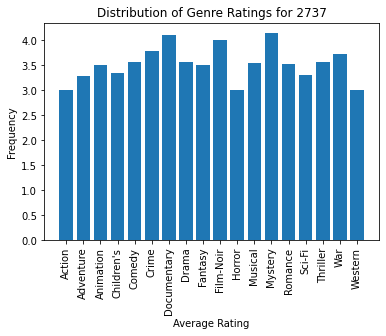

In [4]:
import matplotlib.pyplot as plt
user_id = 2737
plt.bar(ratings_pivot.columns, ratings_pivot.loc[user_id])
plt.xticks(rotation=90)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title(f'Distribution of Genre Ratings for {user_id}')
plt.show()

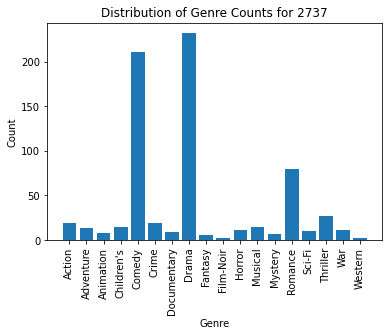

In [15]:
user_id = 2737
count_df = merge_ratings.groupby(
    ['user_id', 'genres']).size().unstack(fill_value=0)
plt.bar(count_df.columns, count_df.loc[user_id])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title(f'Distribution of Genre Counts for {user_id}')
plt.show()


In [5]:
movies_info = pd.read_csv('data/info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

movies_info.head()

,movie_id,name,genre,release_time,intro,directors,stars
0,1,Toy Story (1995),Animation|Adventure|Comedy,22 November 1995 (USA),A cowboy doll is profoundly threatened and jea...,John Lasseter,Tom Hanks|Tim Allen|Don Rickles
1,2,Jumanji (1995),Adventure|Comedy|Family,15 December 1995 (USA),When two kids find and play a magical board ga...,Joe Johnston,Robin Williams|Kirsten Dunst|Bonnie Hunt
2,3,Grumpier Old Men (1995),Comedy|Romance,22 December 1995 (USA),John and Max resolve to save their beloved bai...,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,22 December 1995 (USA),"Based on Terry McMillan's novel, this film fol...",Forest Whitaker,Whitney Houston|Angela Bassett|Loretta Devine
4,5,Father of the Bride Part II (1995),Comedy|Family|Romance,8 December 1995 (USA),George Banks must deal not only with the pregn...,Charles Shyer,Steve Martin|Diane Keaton|Martin Short


In [6]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


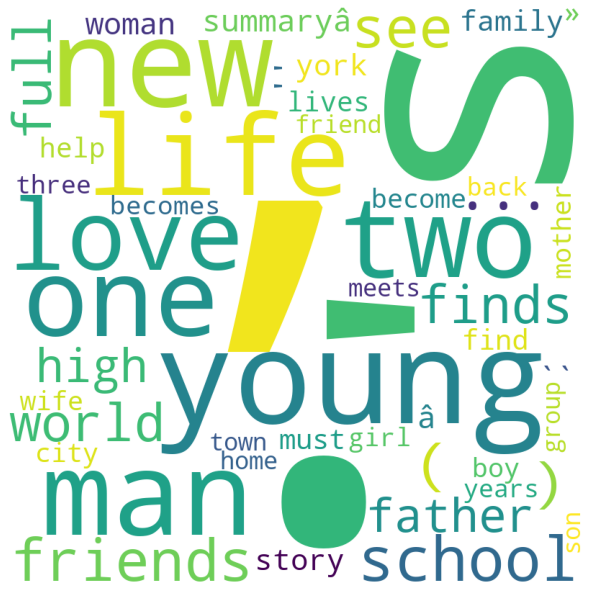

In [16]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

merged_description_ratings = pd.merge(active_ratings, movies_info, on='movie_id')
user_movies = merged_description_ratings.loc[merged_description_ratings['user_id'] == user_id]
text = ' '.join(user_movies['intro'])
words = word_tokenize(text.lower())
filtered_words = [
    word for word in words if word not in stopwords.words('english')]
word_freq = {}
for word in filtered_words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
top_words = dict(sorted_words[:50])
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      min_font_size=10).generate_from_frequencies(top_words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()